# Project: Investigate Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Data analysis of movie dataset. This dataset includes information such as cast, producer, budget, revenue and etc. of over 10k movies. 

>Exploritory questions:
> 1. Which year released movies delivered highest revenue? Which year was the most profitable? 
> 2. Does movie deliver higher revenue if it had greater budget? 
> 3. Do more popular movies get higher votes?
> 4. How movies popularity and average vote changed based on release year?
> 5. Is there any relationship between movie length and average score?
> 6. Which actors have highest average movie rating? Who delivered highest revenue?
> 7. Which are top 3 genres by average vote and popularity? Are these the same genres?
> 8. Which genres delivered highest revenue? Which delivered highest profit? 
> 9. Which are highest revenue generating and most popular production companies? Are these the same? 

In [596]:
#importing packages for case study
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing TMDB document 
df = pd.read_csv('/Users/vitalijuskuica/Projects/Movie project (Udacity 2nd project)/tmdb-movies.csv')

In [597]:
#inspecting dataset
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='wrangling'></a>
## Data Wrangling

In [598]:
#inspecting descriptive statistics 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [599]:
#inspecting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [600]:
#dropping columns I am not going to use. 
#I am only interested in inflation adjusted budget and revenue and not original
df.drop(['homepage','tagline','keywords','imdb_id','budget',
         'revenue','overview',],axis=1, inplace=True)

In [601]:
#changing release year from int to object
dates = ['release_year']
for c in dates:
    df[c] = df[c].astype(object)

In [602]:
#removing adj tag from revenue and budget since i dropped unadjusted columns
df = df.rename(columns={'revenue_adj': 'revenue', 'budget_adj': 'budget'})

In [603]:
#checking if columns have been dropped
df.shape

(10866, 14)

In [604]:
#checking if there is missing data
df.isnull().sum().any()

True

In [605]:
#dropping missing data
df.dropna(inplace=True)

In [606]:
#checking if missing data got dropped
df.isnull().sum().any()

False

In [607]:
#checking for duplicates
df.duplicated().sum()

1

In [608]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [609]:
#checking if duplicates got dropped. 
#P.s. in real code I would not keep these checks in code after validating.
df.duplicated().sum()

0

In [610]:
#list of columns to change scaling 
col_scaling = ['budget','revenue']

#change budget and revenue to millions
for c in col_scaling:
    df[c] = df[c].apply(lambda x: x / 1e6)

In [611]:
#adding profit column to dataframe
profit = df['revenue'] - df['budget']
df['profit'] = profit

In [612]:
#check that scaling changed and new column have been added
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953


In [613]:
#dropping lowest 10% to get rid of outliers for adjuested revenue
drop_rev_low = df[df.revenue > df.revenue.quantile(.1)]

#dropping highest 10% to get rid of outliers for adjuested revenue
drop_rev_outliers = drop_rev_low[drop_rev_low.revenue < drop_rev_low.revenue.quantile(.9)]

In [614]:
#finding average inflation adjusted movie revenue each year
rev_year = drop_rev_outliers.groupby('release_year').mean()

#checking that budget don't have outliers, especially zeros
rev_year.describe()

,id,popularity,runtime,vote_count,vote_average,budget,revenue,profit
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,24327.064123,0.726877,111.735363,211.116314,6.283380,26.906771,78.185325,51.278553
std,47252.891837,0.232218,11.490258,121.636842,0.321201,14.506256,25.111549,25.382601
min,3688.400000,0.384095,101.656716,16.000000,5.895946,8.254816,43.226480,22.504518
25%,9707.899606,0.570421,104.993490,113.907895,6.049585,17.129666,59.455997,31.646463
50%,11792.462582,0.722215,107.679432,188.729115,6.131291,23.367532,71.785386,44.416781
75%,13073.861031,0.818330,112.497727,272.270833,6.481061,34.232442,89.590249,70.068786
max,268860.844560,1.694527,168.500000,569.660465,7.066667,88.583215,145.158823,112.041711


## Data wrangling summary 


> First of all, I researched which information this dataset contains. After doing that I identified data I do not need for my search and dropped these columns. Since I stick with inflation adjusted values for budget and revenue (we always want to compare apple with apples) I decided to rename adjusted columns. 
>
>Also, after inspecting dataset I released that date format is integer so I changed entire column to be object.
>
> My next step was to inspect any missing data and if found drop it. Gaps can skew research so it's important to address that. In this research, I decided to drop NA values instead of filling with mean/median. 
>
>After dropping duplicate values it's extremely important to check for duplicates. One was found and then dropped. 
>
>Budget and revenue were given in full value which looked very messy to read. The best option was to covert these columns to millions as it's most appropriate scaling for this dataset.
>
>My research questions included profitability analysis so I created additional columns that measures movie profit by simply subtracting budget from revenue.
>
>After inspected dataset again I released that there are significant revenue outliers which can skew my research. Some movies most likely didn't hit cinema or had nearly zero revenue or data was not properly collected by TMDB (but let's leave speculations aside). Taking this into account I decided that the best option is evaluate middle 80% of dataset. It was purely my choice and middle 90% could also be used (can't guarantee for results).
>
> Few small data wrangling exercises exist down below in this script. Top data wrangling section includes major clean-up and structuring of data where changes below serve only smart parts of the research and is easier to adjust there if needed.


<a id='eda'></a>
## Exploratory Data Analysis


### 1.Which year released movies delivered highest revenue? Which year was the most profitable?

>Highest average movie revenue was for movies released in 1965 followed by 1976. 
>The most profitable year was 1976 followed by 1979. 

In [615]:
#creating function for all bar charts in case study
def bar_chart(var,color,title,x_label,y_label,rotation):
    var
    plt.subplots(figsize=(16, 5))
    plt.bar(var.index,var,color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.grid(axis='x',color='grey',linestyle = ':',alpha=0.7);

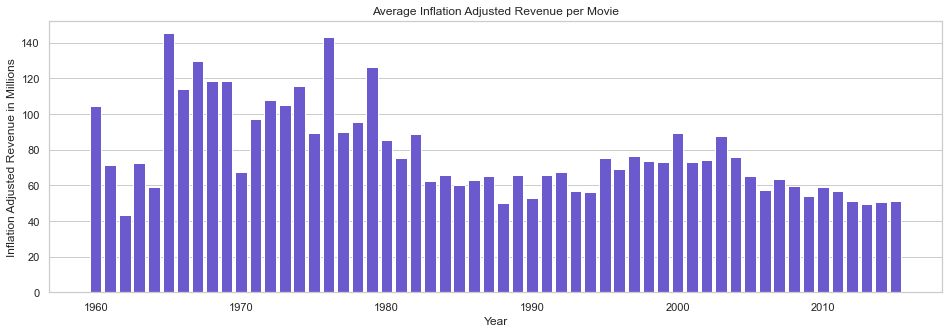

In [616]:
#visualysing average inflation adjusted revenue per movie each year
bar_chart(rev_year['revenue'],'slateblue',
          'Average Inflation Adjusted Revenue per Movie',
         'Year','Inflation Adjusted Revenue in Millions',0)

### Summary of Inflation Adjusted Revenue in Millions 

>Close view at how average revenue changed over years. We can see that movies generated greater revenue in 60s and 70s than ever after (except 1970). Revenue trend seems fairly flat since mid 80s. 

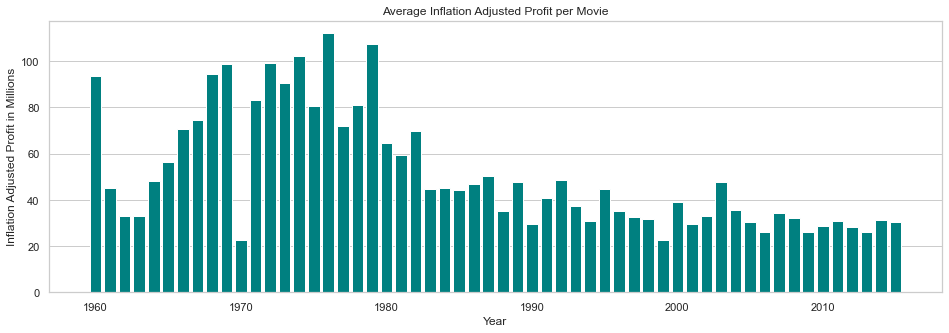

In [617]:
#visualysing average inflation adjusted revenue per movie each year
bar_chart(rev_year['profit'],'teal',
          'Average Inflation Adjusted Profit per Movie',
         'Year','Inflation Adjusted Profit in Millions',0)

### Summary of Inflation Adjusted Profit in Millions graphs

>Close view at at how average profit changed over years. Profit peak as during 60s and 70s. Period after that was fairly flat. We can that see that average profit in 21st dropped by over 3 times since peak in late 60s and 70s.

<a id='eda'></a>
### 2. How movies popularity and average vote changed based on release year?

>Movies popularity keeps on increasing throughout the years. However, this cannot be said about about average vote rating. It has been steadily decreasing. Popularity more than doubled where average vote dropped by about 0.5

>P.s. average vote is from 1 to 10

In [618]:
#creating function for all line charts in case study
def line_chart(var,x_axis,y_axis,color,x_label,y_label,title):
    ax = sns.lineplot(data=var, x=x_axis, y=y_axis, color=color,linewidth=3)
    sns.set(rc={'figure.figsize':(16,8)})
    sns.set(style="whitegrid")
    ax.set(xlabel=x_label, ylabel=y_label,title=title);

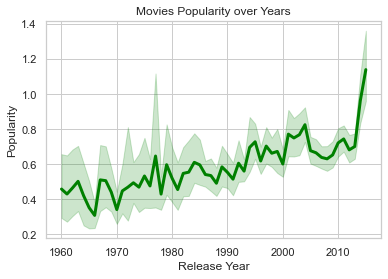

In [619]:
#how movie popularity changed over years?
line_chart(df,'release_year','popularity','green','Release Year',
           'Popularity','Movies Popularity over Years')

### Summary of Movies Popularity over Years graphs

>This analysis was performed to show how popularity changed based of the year it was produced. Popularity is rising extremely and seems to be nearly tripled for movies produced in 21st century vs those in 60s. 

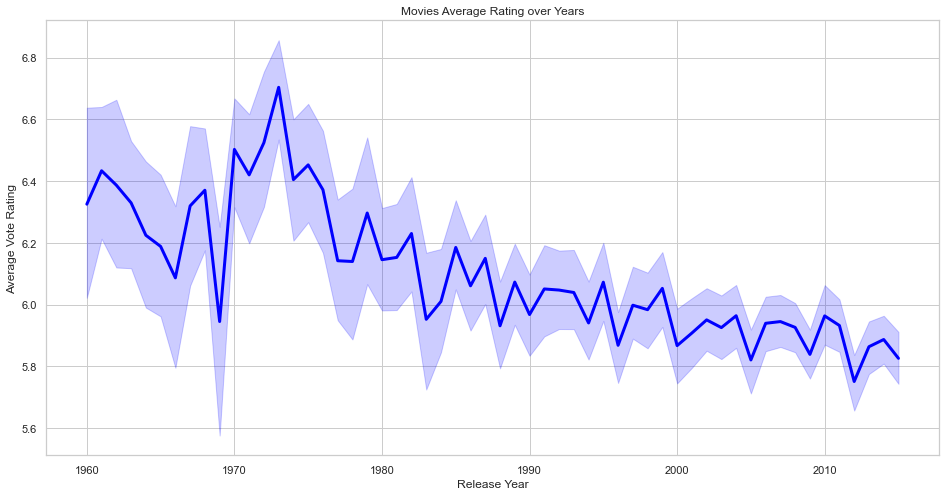

In [620]:
#how movie average vote changed over years?
line_chart(df,'release_year','vote_average','blue','Release Year',
           'Average Vote Rating','Movies Average Rating over Years')

### Summary of Movies Average Rating over Years

>This analysis was performed to show how average movie rating changed based of the year it was produced. It seems like old movies get more prise from viewers comparing to new ones. We can see drop in average vote but it is less significant than hike in popularity.

<a id='eda'></a>
### 3. Do movies budget impact their revenue? 

>To answer this question correlation analysis has been used. It was performed twice. First of all, on original data set. Secondly, on the dataset that excludes 10% of highest and lowest outliers.

>Yes, we can see moderate correlation between budget and revenue. This implicates that higher budget movies tend to likely have greater revenue and vice versa. 

In [621]:
#creating function for all correlation charts in case study
def scatter_plot(size,var1,var2,title,x_label,y_label):
    N = size.count()
    colors = np.random.rand(N)
    area = (30 * np.random.rand(N))**1.5
    plt.scatter(var1,var2,s=area,c=colors, alpha=0.9)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label);

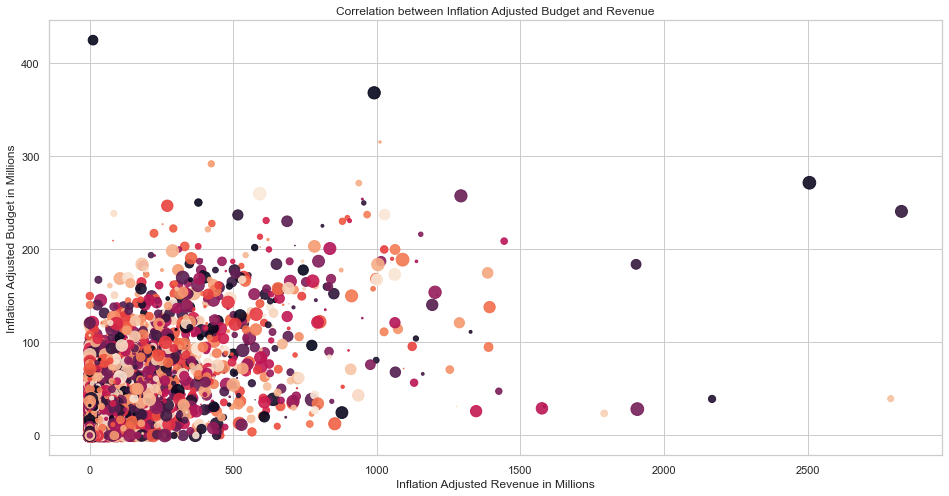

In [622]:
#correlation between adjusted budget and adjusted revenue 
scatter_plot(df['id'],df['revenue'],df['budget'],
            'Correlation between Inflation Adjusted Budget and Revenue',
            'Inflation Adjusted Budget in Millions','Inflation Adjusted Revenue in Millions')

In [623]:
#checking correlation to back op graphs above
df.corr(method ='pearson')

,id,popularity,runtime,vote_count,vote_average,budget,revenue,profit
id,1.000000,0.002229,-0.097810,-0.026940,-0.088895,-0.187132,-0.137220,-0.107302
popularity,0.002229,1.000000,0.156290,0.802956,0.239121,0.505378,0.606458,0.561496
runtime,-0.097810,0.156290,1.000000,0.184285,0.193973,0.249134,0.198307,0.160850
vote_count,-0.026940,0.802956,0.184285,1.000000,0.279851,0.580444,0.704044,0.653544
vote_average,-0.088895,0.239121,0.193973,0.279851,1.000000,0.109789,0.214668,0.217499
budget,-0.187132,0.505378,0.249134,0.580444,0.109789,1.000000,0.640852,0.466935
revenue,-0.137220,0.606458,0.198307,0.704044,0.214668,0.640852,1.000000,0.978076
profit,-0.107302,0.561496,0.160850,0.653544,0.217499,0.466935,0.978076,1.000000


### Summary of Revenue and Budget correlation - Graph and Table (no outliers dropped)

>Includes scatter plot and correlation table with original dataset (only duplicates and missing data were dropped).  Analysis showed moderate correlation between budget and revenue. It concludes that it is likely for movie to generate higher revenue if budget is also higher.

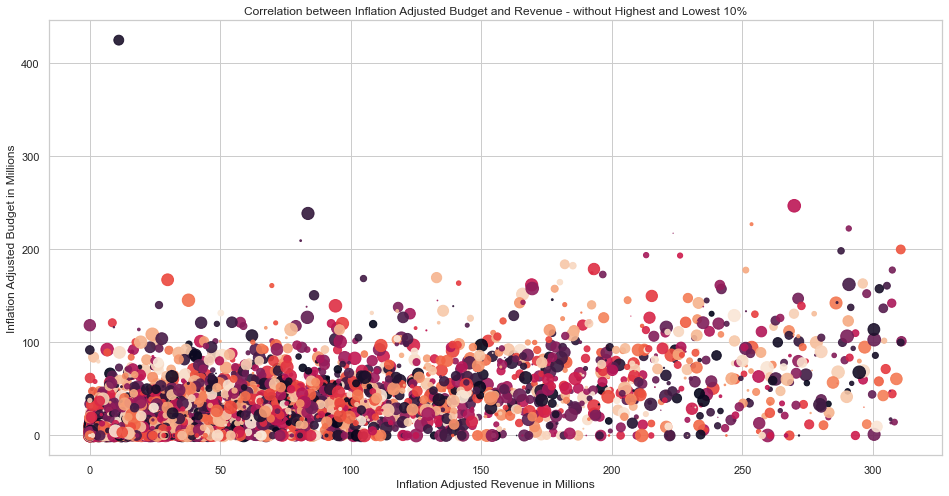

In [624]:
#correlation between adjusted budget and adjusted revenue 
#  without 10% highest and lowest outliers
scatter_plot(drop_rev_outliers['id'],drop_rev_outliers['revenue'],drop_rev_outliers['budget'],
            'Correlation between Inflation Adjusted Budget and Revenue - without Highest and Lowest 10%',
            'Inflation Adjusted Budget in Millions','Inflation Adjusted Revenue in Millions')

In [625]:
#checking correlation between adjusted budget 
# and adjusted revenue measures to back op graph above
drop_rev_outliers.corr(method='pearson')

,id,popularity,runtime,vote_count,vote_average,budget,revenue,profit
id,1.000000,0.218002,-0.011453,0.145279,0.017293,-0.169035,-0.157995,-0.094493
popularity,0.218002,1.000000,0.121416,0.790967,0.247405,0.295499,0.422576,0.339651
runtime,-0.011453,0.121416,1.000000,0.153603,0.287172,0.232041,0.192743,0.100940
vote_count,0.145279,0.790967,0.153603,1.000000,0.309177,0.323978,0.479233,0.391372
vote_average,0.017293,0.247405,0.287172,0.309177,1.000000,-0.063353,0.135689,0.196885
budget,-0.169035,0.295499,0.232041,0.323978,-0.063353,1.000000,0.550709,0.101364
revenue,-0.157995,0.422576,0.192743,0.479233,0.135689,0.550709,1.000000,0.886220
profit,-0.094493,0.339651,0.100940,0.391372,0.196885,0.101364,0.886220,1.000000


### Summary of  Revenue and Budget correlation - Graph and Table (outliers dropped)

>Analysis included scatter plot and correlation table at middle 80% of sample size. Both analysis (with and without ourliers) delivered fairly similar results and showed moderate correlation between budget and revenue. It concludes that it is likely for movie to generate higher revenue if budget is also higher.

<a id='eda'></a>
### 4. Is there any relationship between movie length and average score?

>There is weak if any correlation between movie length and average score. Movie length does not determine if audience is going to rate it well.

In [626]:
#dropping lowest 5% to get rid of outliers for runtime
drop_rt_low = df[df.runtime > df.runtime.quantile(.05)]

#dropping highest 5% to get rid of outliers for runtime
drop_rt_outliers = drop_rt_low[drop_rt_low.runtime < drop_rt_low.runtime.quantile(.95)]

#I ran this without dropping outliers and lows skew scatter plot complately 

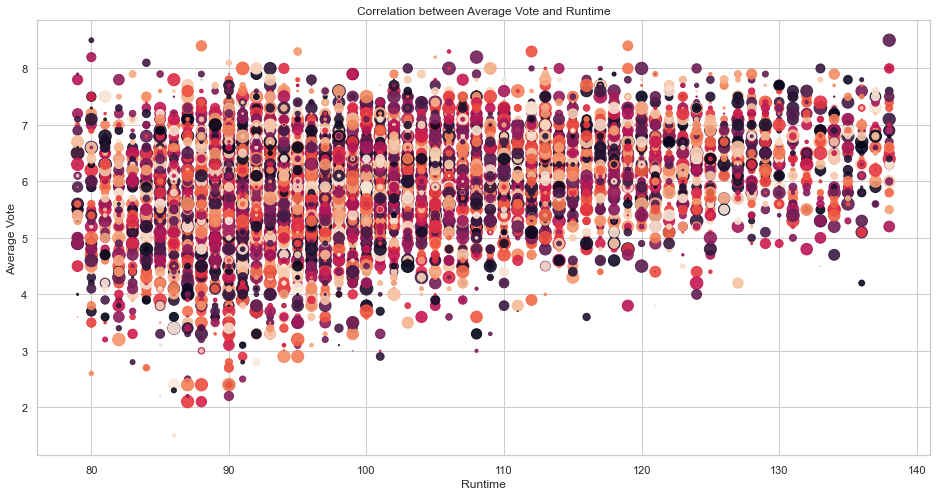

In [627]:
#visualizing correlation between average vote rating and runtime
scatter_plot(drop_rt_outliers['id'],drop_rt_outliers['runtime'],
             drop_rt_outliers['vote_average'],
            'Correlation between Average Vote and Runtime',
             'Average Vote','Runtime')

In [628]:
#getting correlation table to see exact numbers for scatter chart above
drop_rt_outliers.corr(method='pearson')

,id,popularity,runtime,vote_count,vote_average,budget,revenue,profit
id,1.000000,0.019248,-0.136549,-0.013062,-0.112358,-0.183176,-0.135828,-0.103862
popularity,0.019248,1.000000,0.204734,0.787017,0.228932,0.475882,0.581279,0.530952
runtime,-0.136549,0.204734,1.000000,0.228546,0.330120,0.290313,0.236044,0.188356
vote_count,-0.013062,0.787017,0.228546,1.000000,0.280261,0.562271,0.675654,0.614595
vote_average,-0.112358,0.228932,0.330120,0.280261,1.000000,0.090402,0.208950,0.213504
budget,-0.183176,0.475882,0.290313,0.562271,0.090402,1.000000,0.601092,0.406463
revenue,-0.135828,0.581279,0.236044,0.675654,0.208950,0.601092,1.000000,0.974506
profit,-0.103862,0.530952,0.188356,0.614595,0.213504,0.406463,0.974506,1.000000


### Summary of Runtime and Average vote correclation 

>Runtime and average vote analysis was performed twice and only middle 80% was kept since it included many movies with 0 minutes runtime and some with extremely long hours. However, results showed weak correlation between two variables. It does not conclude that movies with shorter or longer runtime have higher or lower average rating.

<a id='eda'></a>
### 5. Do more popular movies get higher votes?

>No, there is weak correlation between popularity and higher average vote. Movies with extremely popularity usually don't end up getting good reviews.

In [629]:
#dropping lowest 5% to get rid of outliers for runtime
drop_pop_low = df[df.popularity > df.popularity.quantile(.05)]

#dropping highest 5% to get rid of outliers for runtime
drop_pop_outliers = drop_pop_low[drop_pop_low.popularity < drop_pop_low.popularity.quantile(.95)]

#I ran this without dropping outliers and highs skew scatter plot complately 

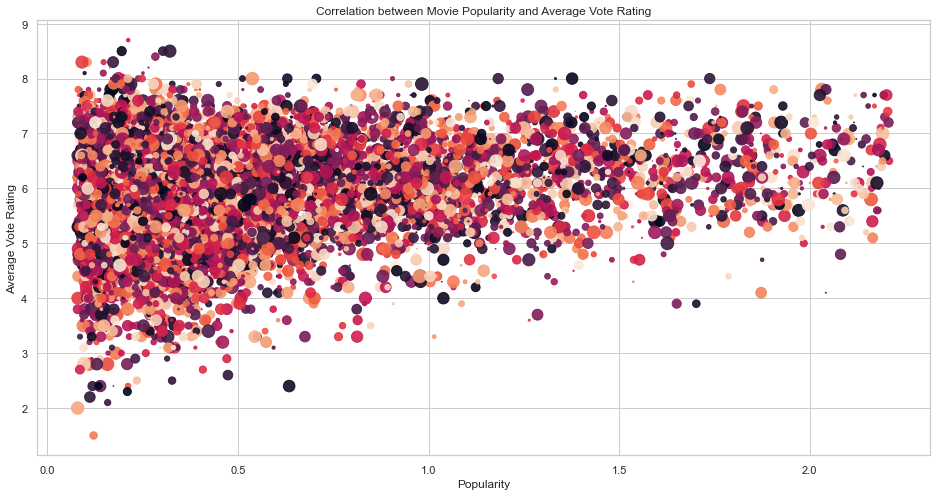

In [630]:
#correlation between popularity and average vote rating
scatter_plot(drop_pop_outliers['id'],drop_pop_outliers['popularity'],
             drop_pop_outliers['vote_average'],
            'Correlation between Movie Popularity and Average Vote Rating',
            'Average Vote Rating','Popularity')

In [631]:
drop_pop_outliers.corr(method='pearson')

,id,popularity,runtime,vote_count,vote_average,budget,revenue,profit
id,1.000000,-0.066297,-0.099252,-0.059052,-0.103786,-0.217715,-0.177266,-0.129745
popularity,-0.066297,1.000000,0.091935,0.672473,0.186573,0.482739,0.502984,0.415110
runtime,-0.099252,0.091935,1.000000,0.116228,0.175199,0.212968,0.160873,0.112394
vote_count,-0.059052,0.672473,0.116228,1.000000,0.218283,0.514727,0.578156,0.491117
vote_average,-0.103786,0.186573,0.175199,0.218283,1.000000,0.041685,0.144976,0.153548
budget,-0.217715,0.482739,0.212968,0.514727,0.041685,1.000000,0.576144,0.319984
revenue,-0.177266,0.502984,0.160873,0.578156,0.144976,0.576144,1.000000,0.958731
profit,-0.129745,0.415110,0.112394,0.491117,0.153548,0.319984,0.958731,1.000000


### Summary of Popularity and Average vote correlation


>Popularity and average vote analysis was performed twice and only middle 80% was kept to drop outliers on both ends. This analysis showed very weak correlation between two variables. It seems like popularity does not guarantee great reviews.

<a id='eda'></a>
### 6. Which actors have highest average movie rating? Who delivered highest revenue?

> Harrison Ford, Mark Hamill, Carrie Fisher, Adam Driver and Daisy Ridley delivered highest average revenue per movie. 

>Best rated movies by audience were those which cast members where David Gilmour, Nick Mason, Richard Wright, Sam Brown and Jon Carin.

I will perform column splits seperately as I gain nothing splitting everything at once

In [632]:
#spliting cast values separeted by '|'
df.cast = df.cast.str.split('|')
cast_split = df.explode('cast')

In [633]:
#finding which actors/actresses appeared in on average highest funded movies
avg_revenue = cast_split.groupby('cast').revenue.mean()
h_budget = avg_revenue.max()

In [634]:
#getting list of actor names that appeared in highest funded movies
top_budget = cast_split[cast_split['revenue'] == h_budget]
top_budget['cast']

3    Harrison Ford
3      Mark Hamill
3    Carrie Fisher
3      Adam Driver
3     Daisy Ridley
Name: cast, dtype: object

In [635]:
#calculating which actors/actress have highest avg vote throught career
#(assuming this data set includes all movies they appeared in)
avg_vote = cast_split.groupby('cast').vote_average.mean()
h_vote = avg_vote.max()
h_vote

8.7

In [636]:
#getting list of actors with highest average rating per movie
top_actors = cast_split[cast_split['vote_average'] == h_vote]
top_actors['cast']

6911     David Gilmour
6911        Nick Mason
6911    Richard Wright
6911         Sam Brown
6911         Jon Carin
Name: cast, dtype: object

### Summary of cast analysis

>Quick look cast members with highest average revenue and highest average viewer ratings helped to see if top rated actors are also top revenue generators. We can see that this isn't the case (at least not top 5). However, this analysis does not intend to answer broader question only limits itself at top 5 highest revenue and average vote cast members. 

<a id='eda'></a>
### 7. Which are top 3 genres by average vote and popularity? Are these the same genres?

> Top 3 best rated genres were history, war, documentary. Top 3 most popular genres were fantasy, science finction and adventure. It seems that most popular movie genres tend to get one of the lowest average vote. On the other hand, best voted genres tend to be among least favorite.

In [637]:
#spliting cast values separeted by '|'
df.genres = df.genres.str.split('|')
genre_split = df.explode('genres')

In [638]:
#dropping lowest 10% to get rid of outliers for adjuested revenue
drop_grev_low = genre_split[genre_split.revenue > genre_split.revenue.quantile(.1)]

#dropping highest 10% to get rid of outliers for adjuested revenue
drop_rev_outliers = drop_grev_low[drop_grev_low.revenue < drop_grev_low.revenue.quantile(.9)]

In [639]:
#finding how popular each movie genre is
pop_genre = drop_rev_outliers.groupby('genres').mean()

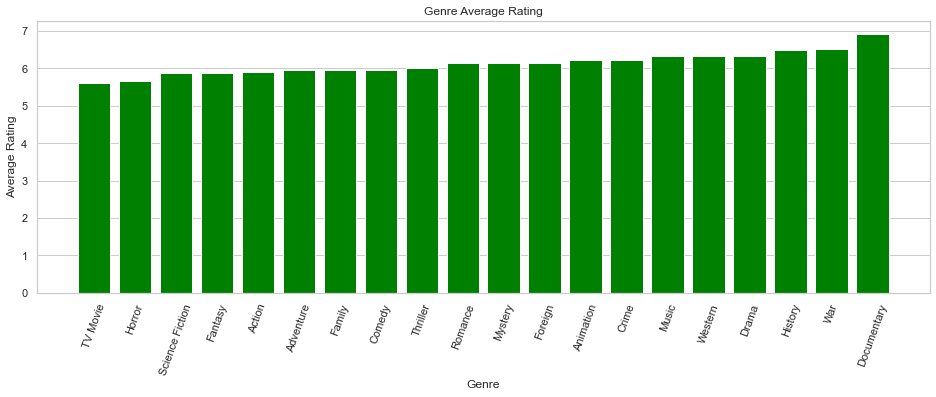

In [640]:
#visualizing movie genres by average vote. 
#making easier to read by sorting low to high
bar_chart(pop_genre['vote_average'].sort_values(),
          'green','Genre Average Rating','Genre','Average Rating',70)

### Summary of Genre Average Popularity graph

>Graph gives great view in terms of how different genres are perceived by viewers. It provides detail view on which genres are best rated among viewers and can be compared to graph below that shows movie popularity. Top rated genres are history, documentary and war.

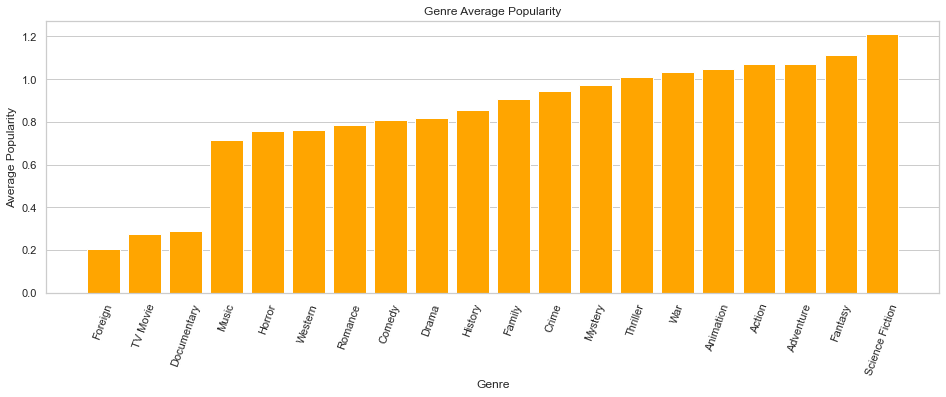

In [641]:
#visualizing movie genres by popularity
#making easier to read by sorting low to high
bar_chart(pop_genre['popularity'].sort_values(),
          'orange','Genre Average Popularity','Genre','Average Popularity',70)

### Summary of Genre Average Rating graph

>Graph gives great view in terms of how different genres are perceived by viewers. It helps to answer questions whether most popular movie genres are also best rated. As results show it works quiet differently. Movie genres that are widely popular don't usually end up getting highest votes from viewers. 

<a id='eda'></a>
### 8. Which genres delivered highest revenue and profit?

>Highest revenue is delivered by adventure, fantasy and family movies. Family movies are second in terms of highest revenue and profit. Other top 3 profitable genres are animation and TV movies. It's interest to see that TV movies deliver one of the lowest revenue but still remained as second most profitable genre. 

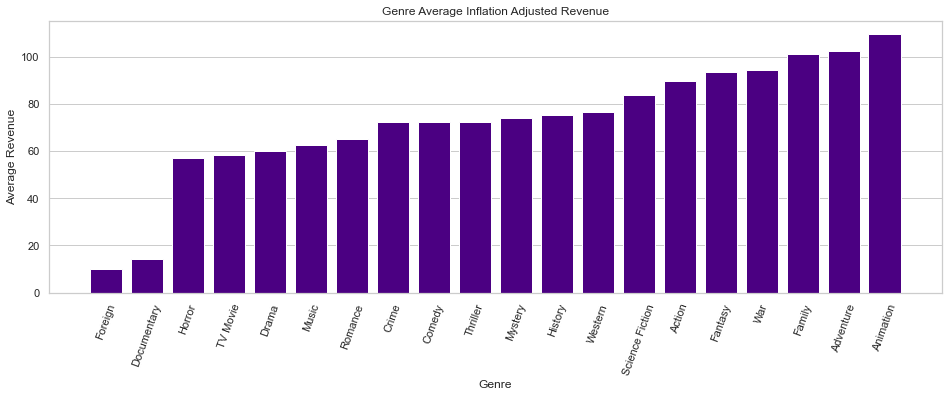

In [642]:
#visualizing movie genres by revenue
bar_chart(pop_genre['revenue'].sort_values(),'indigo',
          'Genre Average Inflation Adjusted Revenue','Genre','Average Revenue',70)

### Summary of Genre Average Inflation Adjusted Revenue graph

>Graph analysis revenue generation per each genre. It helps to understand which genres generate greatest revenue. It works very well with graph below that shows movies profitability. Together it helps to understand where highest revenue generating genres are also best earners which isn't the case.

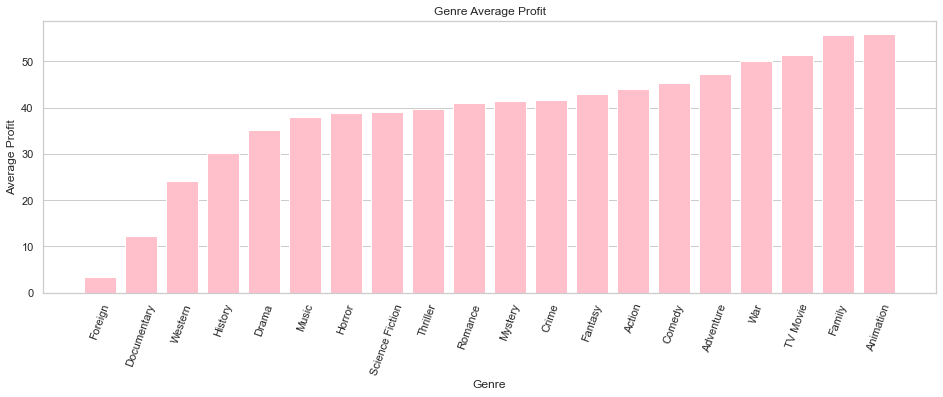

In [643]:
#visualizing movie genres by average vote. 
#making easier to read by sorting low to high
bar_chart(pop_genre['profit'].sort_values(),
          'pink','Genre Average Profit','Genre','Average Profit',70)

### Summary of Genre Average Profit graph

> These graphs served as comparison between revenue and profitable. It gives great view to understand how some movies genres can generate very high revenue but at the same time don't be most profitable ones and vice versa. 

<a id='eda'></a>
### 9. Which are highest revenue generating and most popular production companies? Are these the same?

>Two outstanding companies in terms of profit generation are Truenorth Production and Hoya Production. These two deliivered significantly higher revenue than peers. 
>
>The highest average rated movies are made by Red Bull Media House followed by Brain Fam Digital Cinema. 
>
>Looking at 8 top rated movie creation companies and top 16 revenue generated companies we don't see same brands. Highest revenue doesn't give top 8 seat in terms of vote average. 

In [644]:
#spliting by production company
df.production_companies = df.production_companies.str.split('|')
prod_split = df.explode('production_companies')

In [645]:
group_prod = prod_split.groupby('production_companies').mean()

In [646]:
#picking production companies that have vote count above median.
top_vote = group_prod[group_prod.vote_count >= group_prod.vote_count.median()]

#finding top 0.2% production comapanies based on averate vote
top_prod = top_vote[top_vote.vote_average >= top_vote.vote_average.quantile(.998)]

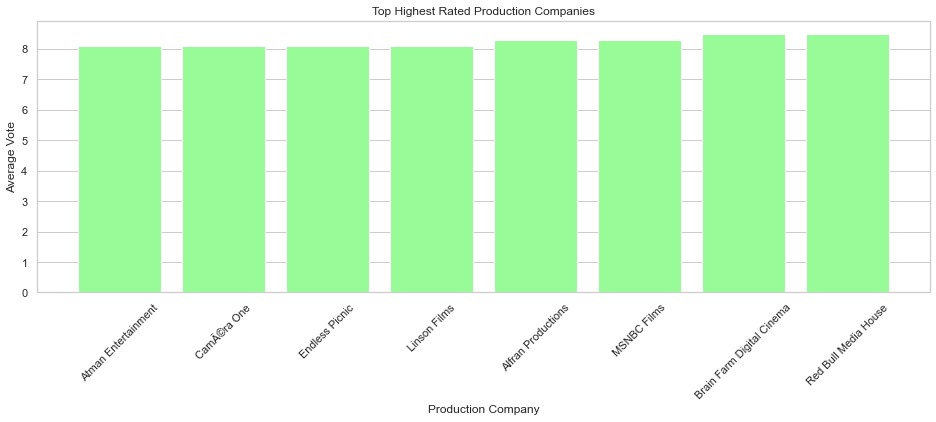

In [647]:
#plotting top 0.2% production comapanies based on averate vote
bar_chart(top_prod['vote_average'].sort_values(),'palegreen',
          'Top Highest Rated Production Companies',
         'Production Company','Average Vote',45)

### Summary of Top Highest Rated Production Companies graph

>Top Highest Rated Production Companies graph was used to identify top of the top companies that produce movies consumers like. Analysis looks into average vote and aggregates that by each company. 

In [648]:
#finding top 0.1% production comapanies based on adjusted revenue
top_rev = group_prod[group_prod.revenue >= group_prod.revenue.quantile(.998)]

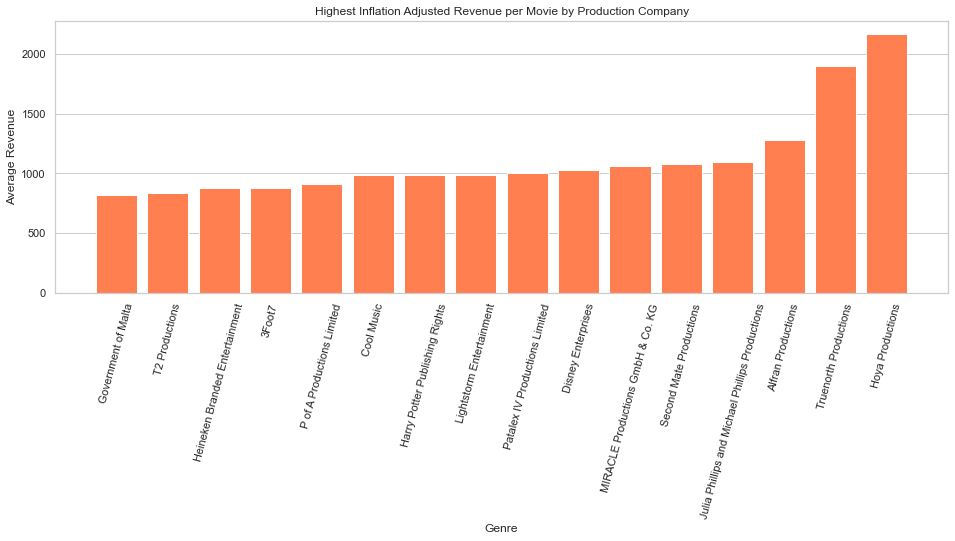

In [649]:
#plotting top 0.1% production comapanies based on adjusted revenue
bar_chart(top_rev['revenue'].sort_values(),'coral',
          'Highest Inflation Adjusted Revenue per Movie by Production Company',
          'Genre','Average Revenue',75)

### Summary of Highest Inflation Adjusted Revenue per Movie by Production Company graph

>Highest Inflation Adjusted Revenue per Movie by Production Company graph is useful addition to total revenue analysis. It looks closely at top companies that generate highest revenue. Clearly there few companies that are way above the rest in terms of making profit. 


<a id='conclusions'></a>
## Conclusions


>After analysing different variables concerning revenue, profitability, popularity and average consumer ratings, it was found that movies popularity is growing significantly for movies made in 21st century comparing to 1960s. On the other hand, average revenue, profitability and consumer ranting is has dropped comparing to movies made during peak in 70s and 80s. Only one year since 1995 average movie profitability was above 40m (analysis looks only within middle 80% of sample size). It was also found that movies with greater budget are likely to have greater revenue. 
>
>Moreover, consumers tend to give best votes for documentary, war and history movies but most popularity are science finction, adventure, and fantay movies. 
>
>Last but not least, TV movies are among top 3 most profitable ones but they fourth lowest revenue which shows how cheap it is to make them. 

### Limitations

>Analysis is limited TMDB movie dataset which might not contain all movies released since 1960. It is also limited to list of cast; production companies given and might not include full list of cast and production companies. 
>
>Also, analysis is limited to given genres in TMDB dataset and might not contain all possible options. 
>
>Analysis is limited to numerical budget and revenue numbers (it was assumed that TMDB dataset includes full value of budget and revenue). It does not include currency used.
>
>Dropping null values and applying certain thresholds to exclude outliers might skew analysis and could have unintentional bias towards results.
